# Sun as an star project 
## test file 


### first goals to get familiarised with the data:  
- open data 
- make cocoplots
- text with frame numer, time, pixels
- caII 8542, Halpha 6563
- time intervals for particula behaviour: e.g. expansion of ribbon, coronal rain, start of flare, surface of loops ...
- context: examine AIA data 
- Extract typical profiles for those behaviours
    -pixel->areas->full field of view
    -fulle profile or Quiet Sun Subtraction (test both)
    
### Questions
- what should be the percentage of the flare area on the solar disk to overcome the threshold of detection
- what behaviours of the flare can be detected from the spacially integrated spectrum
- does sunspots have anything to do with them.
- ...

   

## Possible side project
### nope is not sun as an star so is in Alex paper. 

Malcolm suggest the coronal rain not at the footprints is the cause of the strong redshift contrary to what his supervisor thinks that it happens at the ribbon. This could be checked out through the high resolution footage which is now available. 

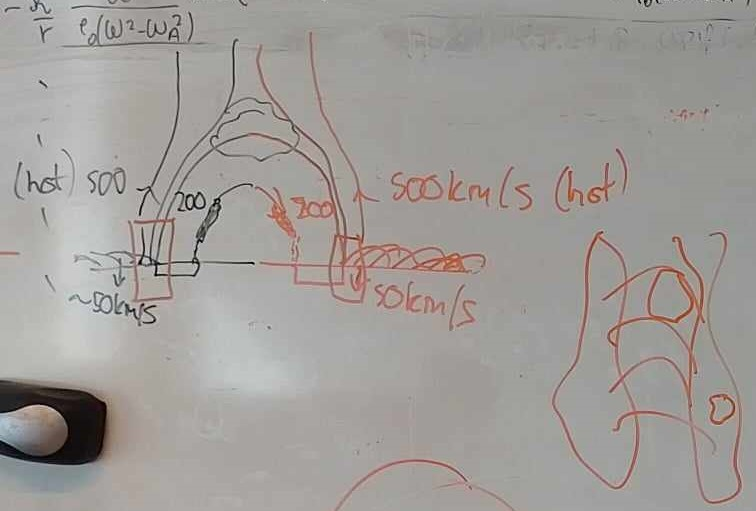

## Data and lines

Helioviewer.org


AIA:
- 171  shows the loop area (which line? )
- 1700 shows more the ribbon area (shows the continuum)

X-rays


## questions for Nessi
* What can nessi do exactly? Tutorial does not really gave me that feeling
    * For example if I use data of a solar flame of the sst what would the spectrum be if all not covered by the sst is quiet sun? Which commands are needed here? 


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import matplotlib.cm as cm
import matplotlib.animation as animation
from PIL import Image

In [2]:
# HALPHA COCOPLOT

# And now the running commands
openfile="nb_6563_2017-09-06T11_55_47_scans=3-215_im.fits"
datacube6563=f.getdata(openfile)
header= f.getheader(openfile)
# print(header)
# np.savetxt('headertest.txt', header)
Ha93_spectfile = rs('spectfile6563_93.idlsave')
Ha93_wavel=Ha93_spectfile["spect_pos"]
print(np.shape(Ha93_wavel))
print(Ha93_wavel)
Ha93_tfile= rs("times6563_93_2017_09_06_11_55_47.idlsave")
# print(Ha93_tfile)
Ha93_time=Ha93_tfile["times"]
print(np.shape(Ha93_time))

Ha93_t=Ha93_time[3:216]
# Ha93_thresh=[1e-10,2e-7]
Ha93_thresh=[1e-10,2e-7]

Ha93_t

(13,)
[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012]
(226,)


array([b'11:56:35.121560', b'11:56:50.083557', b'11:57:05.045489',
       b'11:57:20.034902', b'11:57:35.024278', b'11:57:49.986201',
       b'11:58:04.975473', b'11:58:19.964802', b'11:58:34.926761',
       b'11:58:49.943390', b'11:59:04.905358', b'11:59:19.867292',
       b'11:59:34.829238', b'11:59:49.791103', b'12:00:04.753107',
       b'12:00:19.715088', b'12:00:34.677029', b'12:00:49.639041',
       b'12:01:04.600962', b'12:01:19.590066', b'12:01:34.551891',
       b'12:01:49.541104', b'12:02:04.502963', b'12:02:19.464770',
       b'12:02:34.426572', b'12:02:49.388435', b'12:03:04.350259',
       b'12:03:19.312054', b'12:03:34.301303', b'12:03:49.263115',
       b'12:04:04.224959', b'12:04:19.186847', b'12:04:34.148569',
       b'12:04:49.110464', b'12:05:04.072255', b'12:05:19.034021',
       b'12:05:33.995914', b'12:05:48.957760', b'12:06:03.919616',
       b'12:06:18.881564', b'12:06:33.843518', b'12:06:48.805272',
       b'12:07:03.767191', b'12:07:18.756462', b'12:07:33.7184

(13, 3)


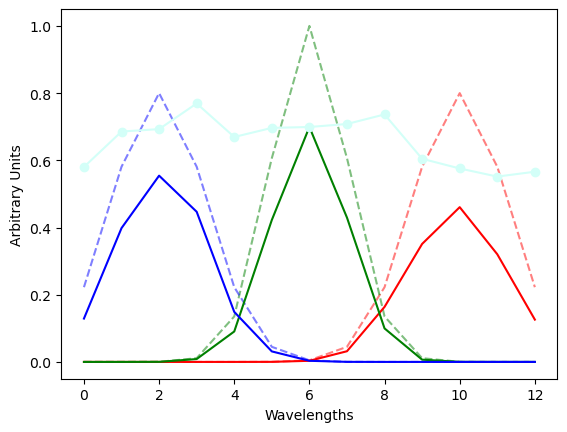

In [3]:
# Now create the cocoplot filters
wavelengths = np.arange(np.shape(datacube6563)[2])
Ha93_filt = cp.filter(wavelengths, 'normal', [[10,1.25], [6,1], [2,1.25]])
print(np.shape(Ha93_filt))
cp.filtplot(datacube6563[0,0,:,600,600], Ha93_filt)

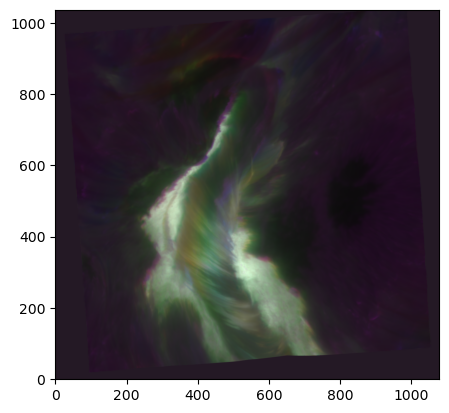

Hα t=12:05:48 UT


In [4]:



# Now view a datacube
i=40
cube = np.nan_to_num(datacube6563[i,0].copy())
cube[np.where(cube > Ha93_thresh[1])] = Ha93_thresh[1]
cube[np.where(cube < Ha93_thresh[0])] = Ha93_thresh[0]
Ha_040_tstr=(f"H\u03B1 t={Ha93_time[i][0:-7]} UT")
Ha_040_tstr=Ha_040_tstr[0:5]+Ha_040_tstr[7:15]+Ha_040_tstr[16:]
Ha_040=cp.plot(cube.copy(), Ha93_filt)
print(Ha_040_tstr)

### pixels to study
@framenumber 40: Hα t=12:05:48 UT
* white:x=529, y=303
* Dark:x=800, y=488
* blue:x=484, y=542
* green:x=430, y=390
* yellowgreen:x=369, y=340

In [5]:
np.shape(datacube6563)
#[time, stokes, wavelength, x/y, y/x]

(213, 1, 13, 1038, 1079)

In [6]:
# [[color, x, y], [...],...]
pixels = [['grey', 529,303], ['black',800,488],['blue', 484,542], ['green',430,390],['yellow',369,340], ['red',600,200]]

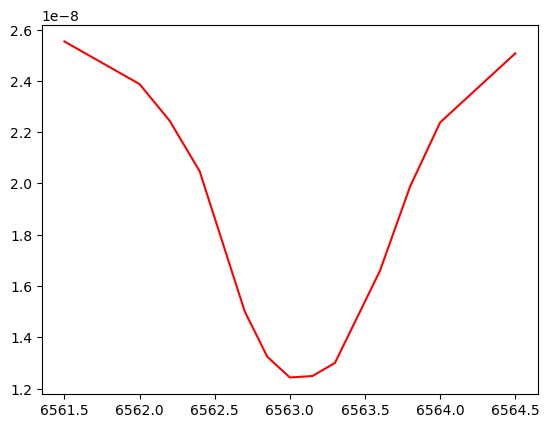

In [7]:
xtemp= 600
ytemp= 200
plt.plot(Ha93_wavel, datacube6563[i,0, :, xtemp, ytemp],color=[1.0,0.0,0.0])

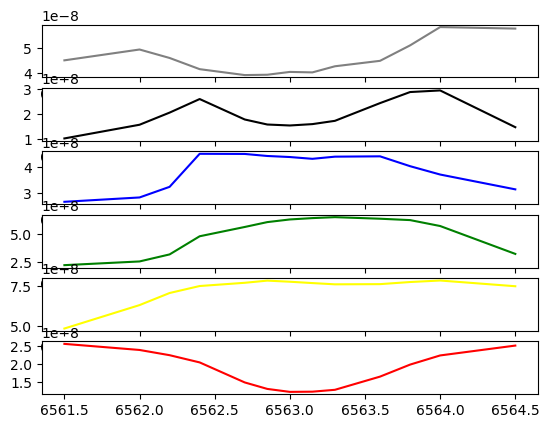

In [8]:
fig, ax = plt.subplots(6)
for p in range(6):
    ax[p].plot(Ha93_wavel, datacube6563[i,0, :, pixels[p][1], pixels[p][2]],color=pixels[p][0])
plt.show()

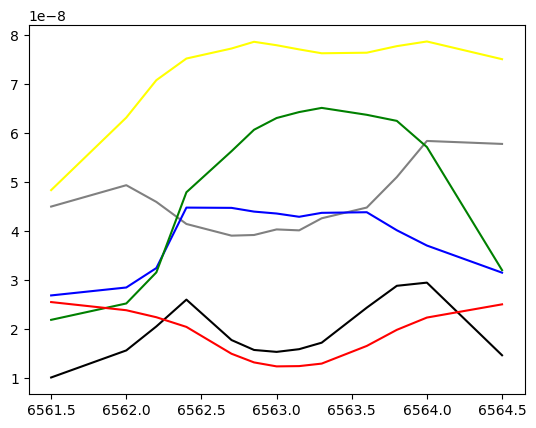

In [9]:
fig, ax = plt.subplots(1)
for p in range(6):
    ax.plot(Ha93_wavel, datacube6563[i,0, :, pixels[p][1], pixels[p][2]],color=pixels[p][0])
plt.show()



OR ARE THESE THE CORRECT ONES???????????


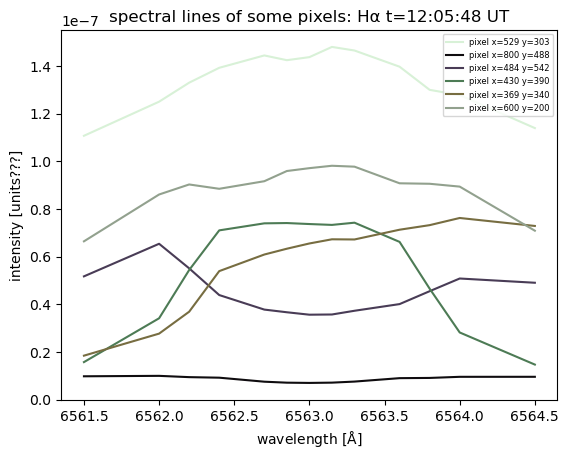

So it looks like it is Y then X in the data sets, ALSO IN THE DATACUBE AND IN THE COCOPLOT?????
 THAT IS WHAT WE FIND HERE  !!!!


In [10]:
i=40
# true color:
# print("These are true color y,x spectral lines")
# fig, ax = plt.subplots(1)
# ax.set_title("spectral lines of some pixels: "+ Ha_040_tstr )
# for p in range(6):
#     ax.plot(Ha93_wavel, datacube6563[i,0, :, pixels[p][1], pixels[p][2]],color=Ha_040[pixels[p][2]][pixels[p][1]]/255,
#             label="pixel x="+str(pixels[p][1])+" y="+str(pixels[p][2]))
# ax.set_xlabel(r"wavelength [$\rm\AA$]")
# ax.set_ylabel("intensity [units???]")
# ax.legend(fontsize=6)
# plt.show()

# print("These are true color x,y spectral lines")
# fig, ax = plt.subplots(1)
# ax.set_title("spectral lines of some pixels: "+ Ha_040_tstr )
# for p in range(6):
#     ax.plot(Ha93_wavel, datacube6563[i,0, :, pixels[p][1], pixels[p][2]],color=Ha_040[pixels[p][1]][pixels[p][2]]/255,
#             label="pixel x="+str(pixels[p][1])+" y="+str(pixels[p][2]))
# ax.set_xlabel(r"wavelength [$\rm\AA$]")
# ax.set_ylabel("intensity [units???]")
# ax.legend(fontsize=6)
# plt.show()
# print("So it looks like it is Y then X in the data sets")

print("\n\nOR ARE THESE THE CORRECT ONES???????????")
fig, ax = plt.subplots(1)
ax.set_title("spectral lines of some pixels: "+ Ha_040_tstr )
for p in range(6):
    ax.plot(Ha93_wavel, datacube6563[i,0, :, pixels[p][2], pixels[p][1]],color=Ha_040[pixels[p][2]][pixels[p][1]]/255,
            label="pixel x="+str(pixels[p][1])+" y="+str(pixels[p][2]))
ax.set_xlabel(r"wavelength [$\rm\AA$]")
ax.set_ylabel("intensity [units???]")
ax.legend(fontsize=6)
plt.show()
print("So it looks like it is Y then X in the data sets, ALSO IN THE DATACUBE AND IN THE COCOPLOT?????\n THAT IS WHAT WE FIND HERE  !!!!")

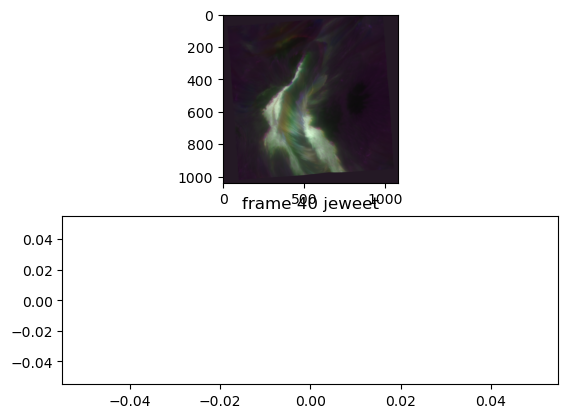

In [11]:
fig, ax = plt.subplots(2)
plt.title('frame 40 jeweet')

i=40
cube = np.nan_to_num(datacube6563[i,0].copy())
cube[np.where(cube > Ha93_thresh[1])] = Ha93_thresh[1]
cube[np.where(cube < Ha93_thresh[0])] = Ha93_thresh[0]
Ha_frame=cp.plot(cube.copy(), Ha93_filt, show=False)


ax[0].imshow(Image.fromarray(Ha_frame[::-1,:]))

ax[1].plot()
plt.show()

In [13]:
# # Many COCOPLOTS
# print(np.shape(datacube6563)) # there are 213 frames normaly
step = 1 # step of number of frames. How to step through the frames, at which rate.
frames = [] # for storing the generated images
fig = plt.figure()
print(np.shape(datacube6563))

for i in range(0,np.shape(datacube6563)[0],step):
    cube = np.nan_to_num(datacube6563[i,0].copy())
    cube[np.where(cube > Ha93_thresh[1])] = Ha93_thresh[1]
    cube[np.where(cube < Ha93_thresh[0])] = Ha93_thresh[0]
    Ha_tstr=(f"H\u03B1 t={Ha93_time[i][0:-7]} UT")
    Ha_tstr=Ha_tstr[0:5]+Ha_tstr[7:15]+Ha_tstr[16:]
    print("COCOPLOT of ", Ha_tstr, "(frame number", i,")") # cocoplots titles kunnen geven zou handig zijn
    Ha_frame=cp.plot(cube.copy(), Ha93_filt, show=False)
    frames.append([plt.imshow(Image.fromarray(Ha_frame[::-1,:]),animated=True)]) #, cmap=cm.Greys_r

print(frames)
ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True)


ani.save('Ha_movie.mp4')

# https://matplotlib.org/2.1.2/gallery/animation/dynamic_image2.html

(213, 1, 13, 1038, 1079)
COCOPLOT of  Hα t=11:55:50 UT (frame number 0 )
COCOPLOT of  Hα t=11:56:05 UT (frame number 1 )
COCOPLOT of  Hα t=11:56:20 UT (frame number 2 )
COCOPLOT of  Hα t=11:56:35 UT (frame number 3 )
COCOPLOT of  Hα t=11:56:50 UT (frame number 4 )
COCOPLOT of  Hα t=11:57:05 UT (frame number 5 )
COCOPLOT of  Hα t=11:57:20 UT (frame number 6 )
COCOPLOT of  Hα t=11:57:35 UT (frame number 7 )
COCOPLOT of  Hα t=11:57:49 UT (frame number 8 )
COCOPLOT of  Hα t=11:58:04 UT (frame number 9 )
COCOPLOT of  Hα t=11:58:19 UT (frame number 10 )
COCOPLOT of  Hα t=11:58:34 UT (frame number 11 )
COCOPLOT of  Hα t=11:58:49 UT (frame number 12 )
COCOPLOT of  Hα t=11:59:04 UT (frame number 13 )
COCOPLOT of  Hα t=11:59:19 UT (frame number 14 )
COCOPLOT of  Hα t=11:59:34 UT (frame number 15 )
COCOPLOT of  Hα t=11:59:49 UT (frame number 16 )
COCOPLOT of  Hα t=12:00:04 UT (frame number 17 )
COCOPLOT of  Hα t=12:00:19 UT (frame number 18 )
COCOPLOT of  Hα t=12:00:34 UT (frame number 19 )
COCOP

### COCOPLOTS for CaII 8542 

In [13]:
# CaII8542 COCOPLOT

# And now the running commands
openfile="nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits"
datacube8542=f.getdata(openfile)

CaII_spectfile = rs('spectfile8542_93.idlsave')
CaII_wavel=CaII_spectfile["spect_pos"]
print("shape of CaII_wavl:", np.shape(CaII_wavel))
print("CaII_wavel:", CaII_wavel)
CaII_tfile= rs("times8542_93_2017_09_06_11_55_47.idlsave")
#print("CaII_tfile: ", CaII_tfile)
CaII_time=CaII_tfile["times"]
print("shape CaII_time:", np.shape(CaII_time),"\n\n")
CaII_t=CaII_time[3:216]
#print(CaII_t)
# CaII_thresh=[1e-10,2e-7]
CaII_thresh=[1e-10,2e-7]



shape of CaII_wavl: (11,)
CaII_wavel: [8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7]
shape CaII_time: (226,) 




 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(11, 3)


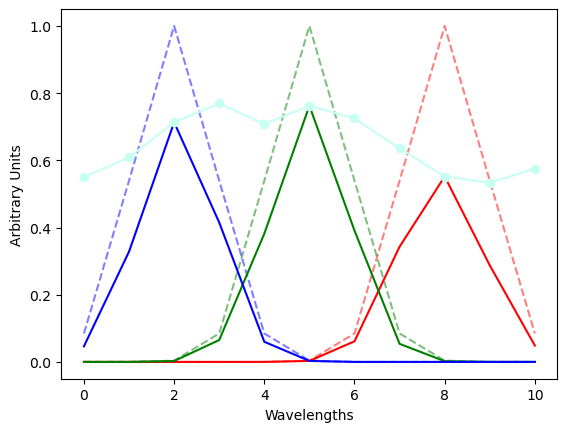

In [14]:
# Now create the cocoplot filters
wavelengths = np.arange(np.shape(datacube8542)[2])
CaII_filt = cp.filter(wavelengths, 'normal', [[8,0.9], [5,0.9], [2,0.9]])
print(np.shape(CaII_filt))
cp.filtplot(datacube8542[0,0,:,600,600], CaII_filt)

The number of wavelength is different. So filters are changed as well.

shape datacube: (213, 4, 11, 1038, 1079)


----------------------------------------
COCOPLOT of  Ca II=b'11:5557' UT (frame number 0 )
  |
  V


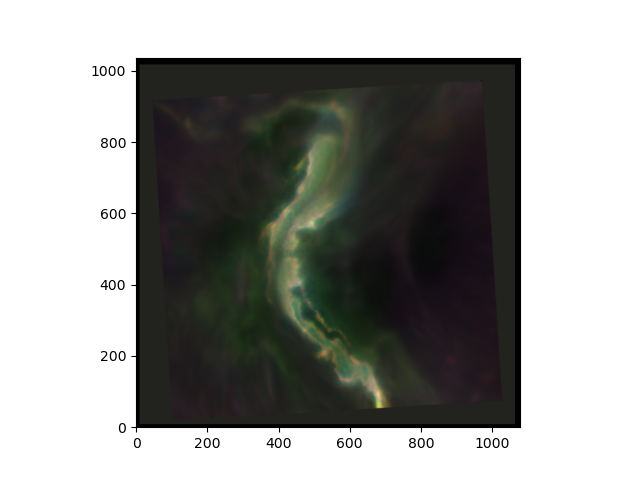

----------------------------------------
COCOPLOT of  Ca II=b'12:1325' UT (frame number 70 )
  |
  V


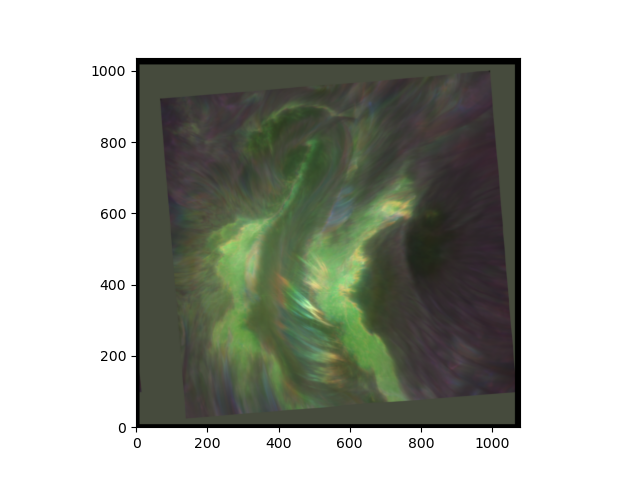

----------------------------------------
COCOPLOT of  Ca II=b'12:3053' UT (frame number 140 )
  |
  V


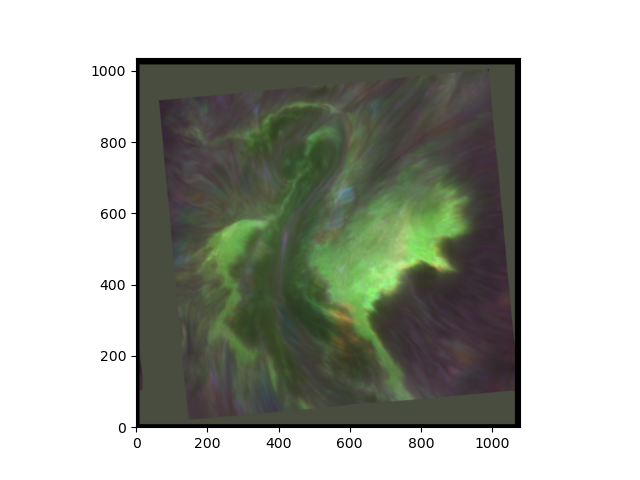

----------------------------------------
COCOPLOT of  Ca II=b'12:4820' UT (frame number 210 )
  |
  V


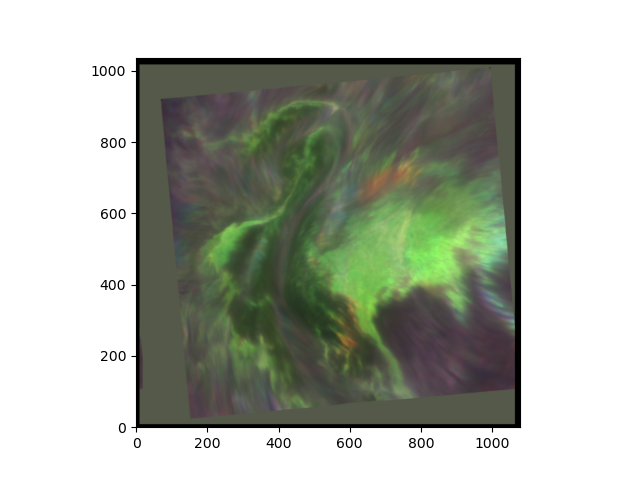

In [15]:
# Many COCOPLOTS
print("shape datacube:", np.shape(datacube8542)) # there are 213 frames normaly
%matplotlib widget
for i in range(0,226,70):
    cube = np.nan_to_num(datacube8542[i,0].copy())
    cube[np.where(cube > CaII_thresh[1])] = CaII_thresh[1]
    cube[np.where(cube < CaII_thresh[0])] = CaII_thresh[0]
    CaII_tstr=(f"Ca II t={CaII_time[i][0:-7]} UT")
    CaII_tstr=CaII_tstr[0:5]+CaII_tstr[7:15]+CaII_tstr[16:]
    print("----------------------------------------\nCOCOPLOT of ", CaII_tstr, "(frame number", i,")\n  |\n  V")
    CaII_frame=cp.plot(cube.copy(), CaII_filt)


(11, 3)


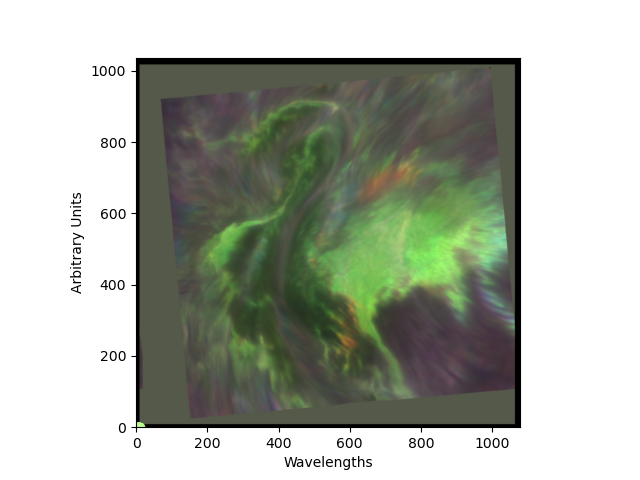

In [16]:
# Now create the cocoplot filters
wavelengths = np.arange(np.shape(datacube8542)[2])
CaII_filt = cp.filter(wavelengths, 'normal', [[1.8,0.9], [5,0.7], [9,01.3]])
print(np.shape(CaII_filt))
cp.filtplot(datacube8542[0,0,:,782,483], CaII_filt)

----------------------------------------
COCOPLOT of  Ca II=b'12:1055' UT (frame number 60 )


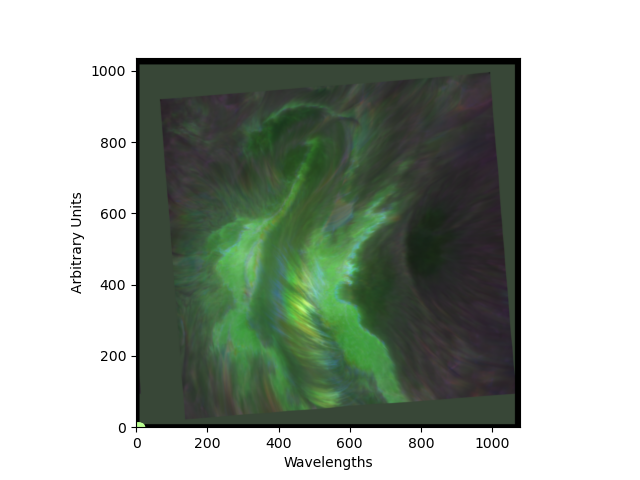

(213, 4, 11, 1038, 1079)

In [17]:
# %matplotlib widget
i= 60
cube = np.nan_to_num(datacube8542[i,0].copy())
cube[np.where(cube > CaII_thresh[1])] = CaII_thresh[1]
cube[np.where(cube < CaII_thresh[0])] = CaII_thresh[0]
CaII_tstr=(f"Ca II t={CaII_time[i][0:-7]} UT")
CaII_tstr=CaII_tstr[0:5]+CaII_tstr[7:15]+CaII_tstr[16:]
print("----------------------------------------\nCOCOPLOT of ", CaII_tstr, "(frame number", i,")")
CaII_frame=cp.plot(cube.copy(), CaII_filt)

%matplotlib inline

np.shape(datacube8542)

Interesting pixels:
    x,y
    782,483
    419,533
253,536
329,294
565,572
837,466
250,724
93, 881
158,53
739,101


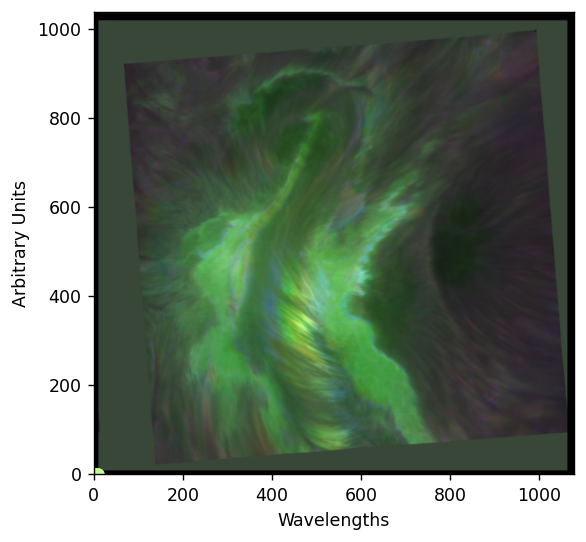

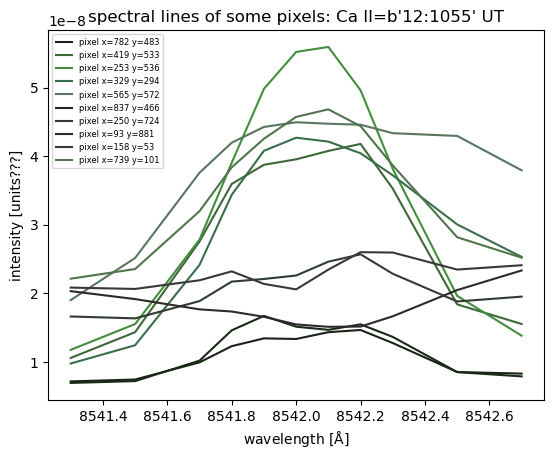

In [18]:
pixels = np.array([[782,483],[419,533],[253,536],[329,294],[565,572],[837,466],[250,724],[93, 881],[158,53],[739,101]])

fig, ax = plt.subplots(1)
ax.set_title("spectral lines of some pixels: "+ CaII_tstr )
for p in range(len(pixels)):
    ax.plot(CaII_wavel, datacube8542[i,0, :, pixels[p][1], pixels[p][0]],color=CaII_frame[pixels[p][1]][pixels[p][0]]/255,
            label="pixel x="+str(pixels[p][0])+" y="+str(pixels[p][1]))
ax.set_xlabel(r"wavelength [$\rm\AA$]")
ax.set_ylabel("intensity [units???]")
ax.legend(fontsize=6)
plt.show()

In [19]:
print(np.shape(datacube8542))
print(np.shape(CaII_frame))
print(datacube8542[i,0, :, pixels[p][1], pixels[p][0]])


(213, 4, 11, 1038, 1079)
(1038, 1079, 3)
[2.21235562e-08 2.35319150e-08 3.19714949e-08 3.83659826e-08
 4.25346646e-08 4.57232217e-08 4.68194302e-08 4.43684537e-08
 3.86458484e-08 2.81668805e-08 2.51867284e-08]


In [20]:
img = Image.fromarray(CaII_frame[::-1,:])
# img.save('testrgb.png')
print(CaII_frame)
print()
print(CaII_frame[::-1,:])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


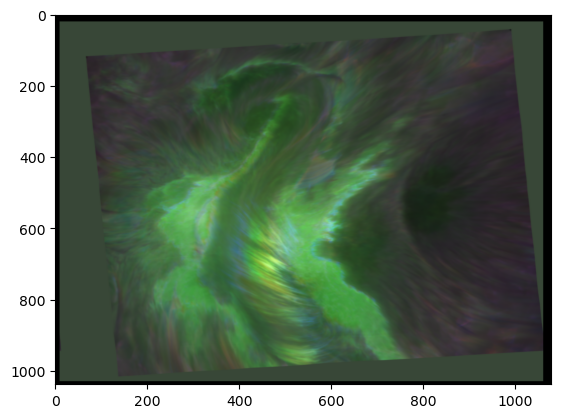

In [21]:

# plt.imshow(img, extent=[0, 16000, 0, 1], aspect='auto')
plt.imshow(img, aspect='auto')
plt.show()


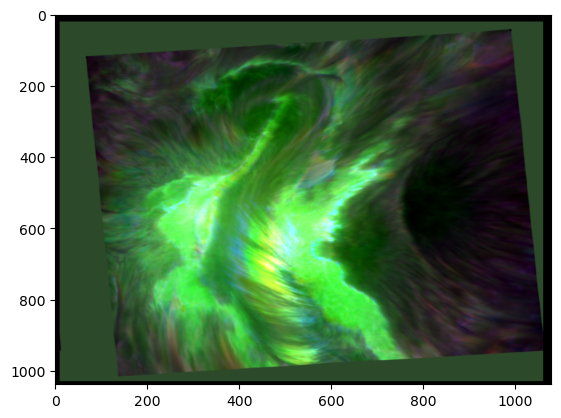

In [22]:
# contrast = ImageEnhance.Contrast(img)
# contrast.enhance(2).show()

new_img = ImageEnhance.Contrast(img).enhance(factor=2)
plt.imshow(new_img, aspect='auto')
plt.show()

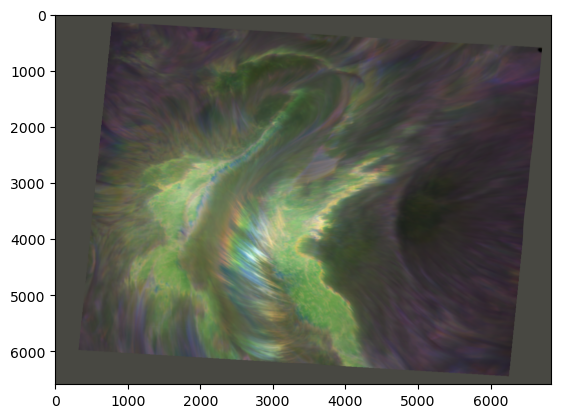

(6586, 6836, 3)

In [23]:
# %matplotlib widget
img2= Image.open("cocoplot_ca_I_frame060.png")
# img2.show()
plt.imshow(img2, aspect='auto')
plt.show()
np.shape(img2)

In [24]:
print(6586*6836*3*256/1024**3 ) # so only worth 32 GB?????
print(6586*6836*11/1024**3)

32.20216941833496
0.46122898906469345


## Using NESSI 


In [25]:
from nessi.tester import load_data
from nessi import integrator as nss
import matplotlib.colors as mcolors
from scipy.interpolate import interp1d

Here we will try to create the following spectra of the H alpha line: The spectrum of a Quiet sun, a true spectrum of H alpha, the average spectrum over the active region of the SST and One with the AR + quiet sun. 

My gess is here that nr is the number of wavelengts used in the spectrum. 

In [26]:
wav = Ha93_wavel # wavelengths
dc = Ha93_spectfile # intensities for those wavelengths?
mu = None  # the mu of the cos(angle) made with line of sight?
clv = None # center to limb variations (what are those units? )
# print(wav, len(wav))
print(dc, dc.keys())
print(np.shape(dc['norm_spect']), np.shape(dc['spect_pos']))
# print(clv)

saas = nss.sun_as_a_star(nr=13)

{'norm_spect': array([406.26572, 384.60892, 355.0522 , 298.89658, 175.16345, 162.3349 ,
       159.41875, 163.36519, 175.86842, 284.0429 , 343.68027, 380.74896,
       401.36374], dtype=float32), 'norm_factor': 4.0, 'spect_pos': array([6561.49999988, 6562.        , 6562.19999999, 6562.39999998,
       6562.69999999, 6562.84999999, 6563.        , 6563.15000001,
       6563.30000001, 6563.60000002, 6563.80000001, 6564.        ,
       6564.50000012])} dict_keys(['norm_spect', 'norm_factor', 'spect_pos'])
(13,) (13,)


## ATENTION !!
when integrating/averaging over the sst data make VERY SURE that the 'grey' outsides are not been included in this proces. 

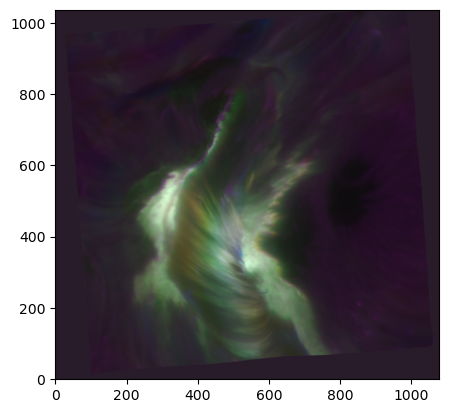

Hα t=12:10:48 UT


In [27]:
# Now view a datacube
i=60
cube = np.nan_to_num(datacube6563[i,0].copy())
cube[np.where(cube > Ha93_thresh[1])] = Ha93_thresh[1]
cube[np.where(cube < Ha93_thresh[0])] = Ha93_thresh[0]
Ha_060_tstr=(f"H\u03B1 t={Ha93_time[i][0:-7]} UT")
Ha_060_tstr=Ha_060_tstr[0:5]+Ha_060_tstr[7:15]+Ha_060_tstr[16:]
Ha_060=cp.plot(cube.copy(), Ha93_filt)
print(Ha_060_tstr)




grey 529 303
black 800 488
blue 484 542
green 430 390
yellow 369 340
red 600 200
purple 0 0
purple 0 1
purple 15 10
purple 3 7


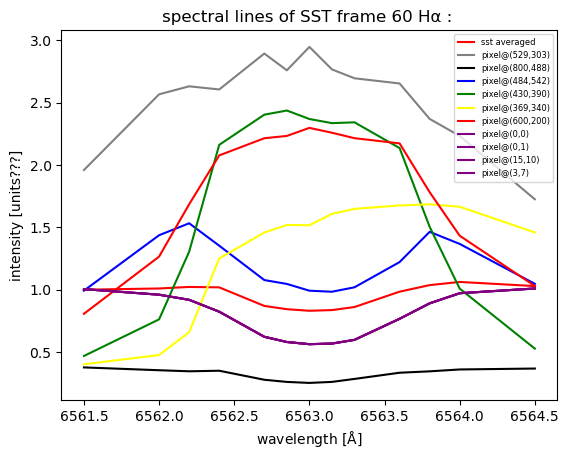

In [28]:
frame = 60

spec_sst = np.array([np.average(datacube6563[frame,0,i,:,:]) for i in range(13)])
#[time, stokes, wavelength, x/y, y/x]

fig, ax = plt.subplots(1)
ax.set_title("spectral lines of SST frame 60 H\u03B1 : ")
ax.plot(Ha93_wavel, spec_sst/spec_sst[0],color='red', label="sst averaged")

# test locaties om te vergelijken met het totale spectrum
pixels = [['grey', 529,303], ['black',800,488],['blue', 484,542], ['green',430,390],['yellow',369,340], ['red',600,200]
          , ["purple",0,0], ["purple",0,1], ["purple",15,10], ["purple",3,7]]

scaler = np.average(datacube6563[frame,0,0,:,:])

for p in range(len(pixels)):
    col, x, y = pixels[p]
    print(col, x, y)
    # col = pixels[p][0]
    # x = pixels[p][1]
    # y = pixels[p][2]

    ax.plot(Ha93_wavel, datacube6563[frame,0,:,y,x]/scaler,color=col, label="pixel@("+str(x)+","+str(y)+")")
ax.set_xlabel(r"wavelength [$\rm\AA$]")
ax.set_ylabel("intensity [units???]")
ax.legend(fontsize=6)
plt.show()


In [29]:
# np.where()
print(np.shape(datacube6563))
zero = datacube6563[frame,0,:,0,0]

R = np.array([(datacube6563[frame,0,:,i,j]==zero)[0] for i in range(1038) for j in range(1079)])
print(R)
R = np.where(R, 0, 1).reshape((1038, 1079))
# print(R, np.shape(R))
print("only", np.average(R), "of content of datacube is actual information. Use R to exclude the outside.")
# testcube = np.array([datacube6563[frame,0,:,i,j] for i,j in range])

(213, 1, 13, 1038, 1079)
[ True  True  True ...  True  True  True]
only 0.818727109415876 of content of datacube is actual information. Use R to exclude the outside.


We now do it again while excluding the grey area

(1038, 1079) (1038, 1079)


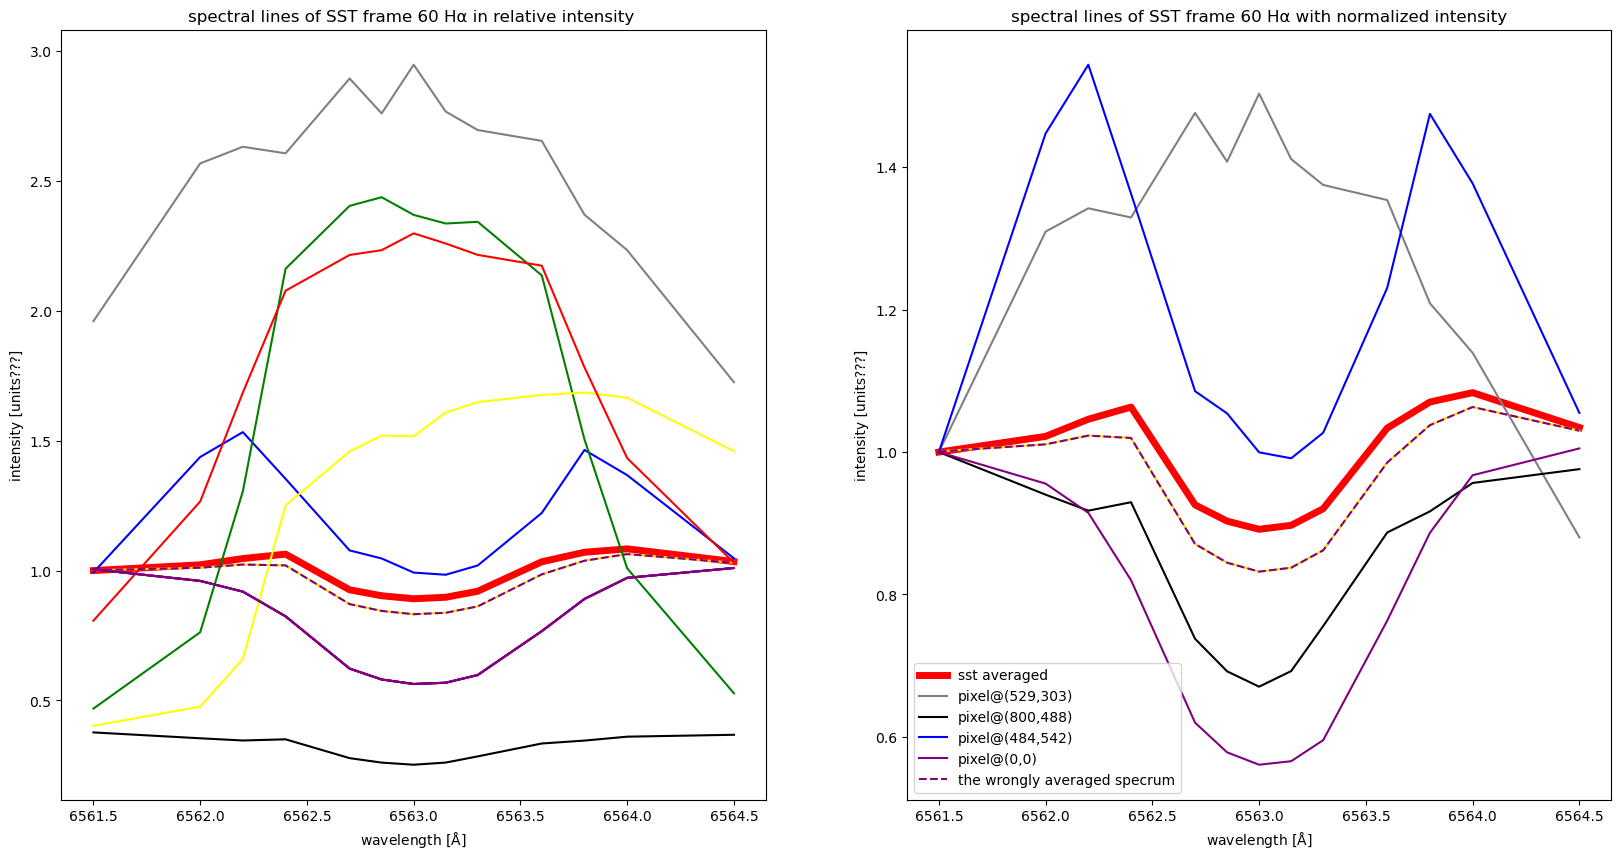

In [30]:
frame = 60
print(np.shape(datacube6563[frame,0,0,:,:]),np.shape(R))
spec_sst2 = np.array([np.average(datacube6563[frame,0,i,:,:],weights=R) for i in range(13)])

#[time, stokes, wavelength, x/y, y/x]

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
ax[0].set_title("spectral lines of SST frame 60 H\u03B1 in relative intensity ")
ax[0].plot(Ha93_wavel, spec_sst2/spec_sst2[0],color='red', label="sst averaged", linewidth=5)
ax[0].plot(Ha93_wavel, spec_sst/spec_sst2[0],color='gold', label="sst averaged wrong")

# test locaties om te vergelijken met het totale spectrum
pixels = [['grey', 529,303], ['black',800,488],['blue', 484,542], ['green',430,390],['yellow',369,340], ['red',600,200]
          , ["purple",0,0], ["purple",0,1], ["purple",15,10], ["purple",3,7]]

scaler = np.average(datacube6563[frame,0,0,:,:])

for p in range(len(pixels)):
    col, x, y = pixels[p]
    ax[0].plot(Ha93_wavel, datacube6563[frame,0,:,y,x]/scaler,color=col, label="pixel@("+str(x)+","+str(y)+")")

p=8
ax[0].plot(Ha93_wavel, datacube6563[frame,0,:,y,x]/scaler *(1-0.818727109415876) + 0.818727109415876*spec_sst2/spec_sst2[0] ,'--',color=col, label="pixel@("+str(x)+","+str(y)+")")

ax[0].set_xlabel(r"wavelength [$\rm\AA$]")
ax[0].set_ylabel("intensity [units???]")
# ax[0].legend(fontsize=6)


# second plot
ax[1].set_title("spectral lines of SST frame 60 H\u03B1 with normalized intensity")
ax[1].plot(Ha93_wavel, spec_sst2/spec_sst2[0],color='red', label="sst averaged", linewidth=5)
ax[1].plot(Ha93_wavel, spec_sst/spec_sst2[0],color='gold')

# test locaties om te vergelijken met het totale spectrum
pixels = [['grey', 529,303], ['black',800,488],['blue', 484,542], #['green',430,390], ['yellow',369,340], ['red',600,200],
          ["purple",0,0]]


for p in range(len(pixels)):
    col, x, y = pixels[p]
    ax[1].plot(Ha93_wavel, datacube6563[frame,0,:,y,x]/datacube6563[frame,0,0,y,x],color=col, label="pixel@("+str(x)+","+str(y)+")")

p=8
ax[1].plot(Ha93_wavel, datacube6563[frame,0,:,y,x]/scaler *(1-0.818727109415876) + 0.818727109415876*spec_sst2/spec_sst2[0]
           ,'--',color=col, label="the wrongly averaged specrum")

ax[1].set_xlabel(r"wavelength [$\rm\AA$]")
ax[1].set_ylabel("intensity [units???]")
ax[1].legend()
plt.show()

##############################################
#  The spectrum of the sst AR: spec_sst2     #
##############################################


### Remark
We need more wavelength resolution (now we have only 13)

Filename: 6563_clv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  WAV           1 ImageHDU         7   (59,)   float64   
  2  MU            1 ImageHDU         7   (50,)   float64   
  3  INT           1 ImageHDU         8   (50, 59)   float64   
  4  INT_SMOOTH    1 ImageHDU         8   (50, 59)   float64   
  5  INT_VAR       1 ImageHDU         8   (50, 59)   float64   
  6  INT_COUNT     1 ImageHDU         8   (50, 59)   float64   
  7  SST_INSTRUMENT_PSF    1 ImageHDU         8   (2, 73)   float64   


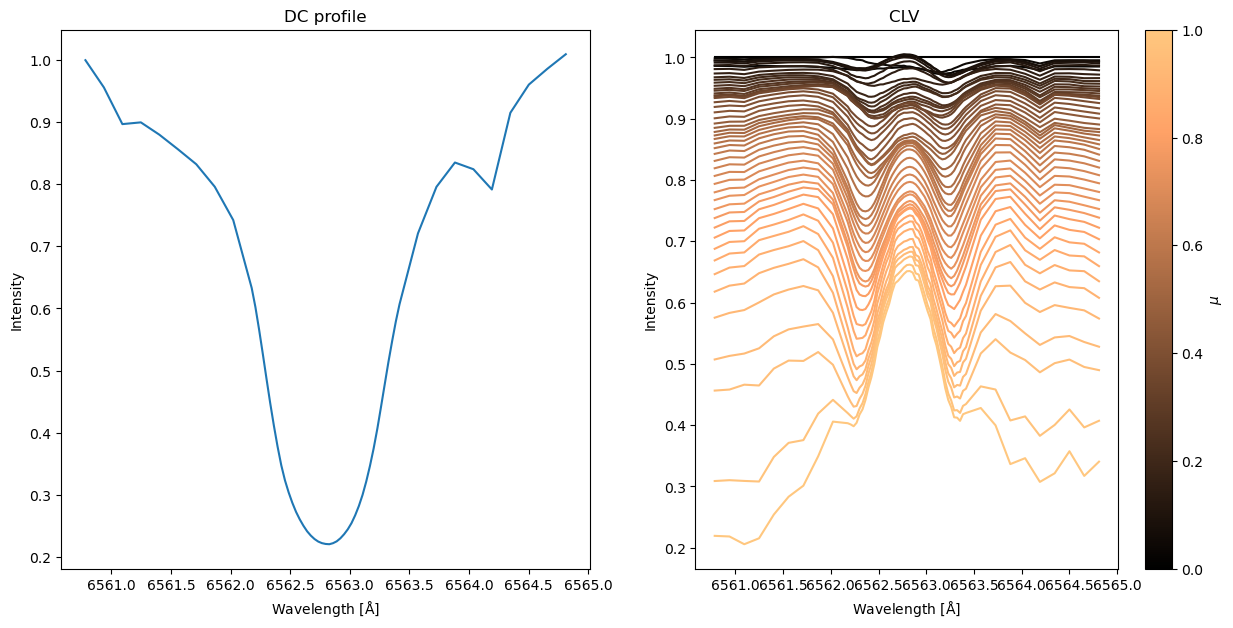

In [31]:


has = f.open('6563_clv.fits')
has.info()

sst_wav = has[1].data
sst_mu = has[2].data
sst_int = has[4].data.T

# CLV profiles should be normalized in such a way that at mu=1 it is is 1 all over, and the rest is above (or is it under?).
sst_dc = sst_int[0]
sst_clv = sst_int.copy()
sst_clv /= sst_clv[0]

# We remove the intensity varitions and then place them back base on neckle and labs
# For better accuracy in intensity

# create colormap
cm = plt.cm.copper(np.linspace(0,1, 50))

fig = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
plt.plot(sst_wav, sst_dc)
plt.title('DC profile')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')

ax =plt.subplot(122)
ax.set_prop_cycle('color', list(cm))
ax.plot(sst_wav,sst_clv.T)
plt.title('CLV ')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.copper, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'$\mu$')

# ax1 = plt.subplot(133)
# ax1.set_prop_cycle('color', list(cm))
# ax1.plot(sst_wav,sst_clv2.T)
# plt.title('Limbdarkening ')
# plt.xlabel(r'Wavelength [$\rm\AA$]')
# plt.ylabel('Intensity')
# norm = mcolors.Normalize(vmin=0, vmax=1)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.copper, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax1)
# cbar.set_label(r'$\mu$')
plt.show()



In [32]:

#We include an atlas to compare the data with (always good to check if all works well!)
atlas = f.getdata('solar_atlas_V1_405-1065.fits')
atlas_w = np.arange(len(atlas)) * -0.003766534468 + 24700.0858041
aw = 1e8 / atlas_w

#Cut the atlas near where the line is (Keep in mind that we use air wavelenths,
# and they use vacuum, so youll need to shift it)
lw = sst_wav[0]
rw = sst_wav[-1]

# llw = np.where(aw > lw-3)[0][0]
# lrw = np.where(aw > rw+3)[0][0]
llw = np.where(aw > lw-1)[0][0]
lrw = np.where(aw > rw+3)[0][0]

fd = atlas[llw:lrw]
fdw = aw[llw:lrw]

ff = interp1d(fdw, fd, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_wav)
%matplotlib inline

the minima are at  6564.640162385377 (atlas) and 6562.797056366136 (nessi). Therefor they are  1.8431060192415316 appart.
-1.8231060192415316
crisp::read_reflectivity: (RL,RH)[6563.0] = (0.8491852821292993, 0.9329974907090325)
crisp::read_reflectivity: (RL,RH)[6563.0] = (0.8491852821292993, 0.9329974907090325)


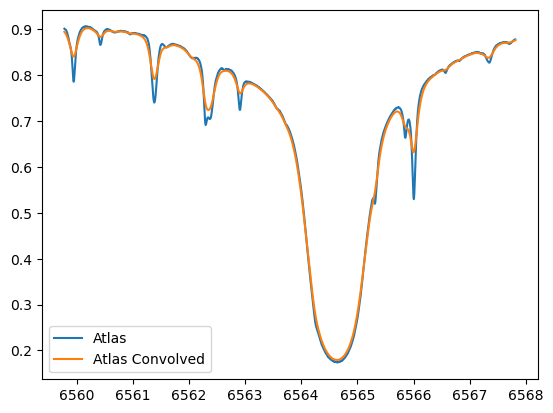

In [40]:
#wav, dc, mu, clv = load_data()
saas = nss.sun_as_a_star(nr=101)
saas.update_clv(sst_mu,sst_wav,sst_clv,sst_wav,sst_dc)
saas.update_vrot(0.,0.)
test_si = saas.get_integration()

#test_si = test_si/np.min(test_si)*np.min(test_si)
test_si = test_si/test_si[0]
sst_dc = sst_dc/sst_dc[0]
fdd = fdd/fdd[0]

# rechtse verschruiving maar hoeveel ?????? opv air an vacuum wavelengths; WELKE EENHEDEN!!!! WAJOW
# -0.04681106851425487 nm equals almost -1133
rv = -1133 #-946

# minimum determination
xatlas = np.where(fd == np.min(fd))
# print(xatlas[0][0])
x_si = np.where(test_si == np.min(test_si))
# print(x_si[0][0])



print("the minima are at ", fdw[xatlas][0], '(atlas) and', sst_wav[x_si][0], "(nessi). Therefor they are ",
       fdw[xatlas][0]-sst_wav[x_si][0],"appart.")
rv = - fdw[xatlas][0] + sst_wav[x_si][0]  #1.8431060192415316

rv += 0.02
print(rv)


import ISPy.spec.crisp as c
dw = 0.07  #0.07
ntw = 59  #59
tw = (np.arange(ntw)-ntw//2)*dw
fpife = c.crisp(6563)                   # IMPORTANT TO USE CORRECT WAVELENGTH
fc = c.crisp(6563.0)
tr = fc.dual_fpi(tw, erh = -0.022) #6301-2, erh = -0.022
# print(tr)
# tr +=0.3 #6301-2, erh = -0.022
# print(tr)

tr /= tr.sum()
inst_prof = np.zeros((len(tr),2))
inst_prof[:,0] = tw+np.abs(tw.min())
inst_prof[:,1] = tr

import ISPy.spec.calib as cb

# Convolve spectral atlas profile with instrument profile (after interpolation
#   to the atlas wavelength grid)
# print(fdw, fd, inst_prof)
aa = cb.convolve_atlas(fdw,fd,inst_prof)



aa2 = aa
# plt.close()
plt.plot(fdw,fd, label="Atlas")
plt.plot(fdw,aa, label="Atlas Convolved")
plt.legend()
plt.show()




[0.8948441  0.894625   0.8943981  ... 0.8762082  0.87626994 0.8763299 ] (4949,)
1 6559.782367991155 6560.782056366135
2 6560.782056366135


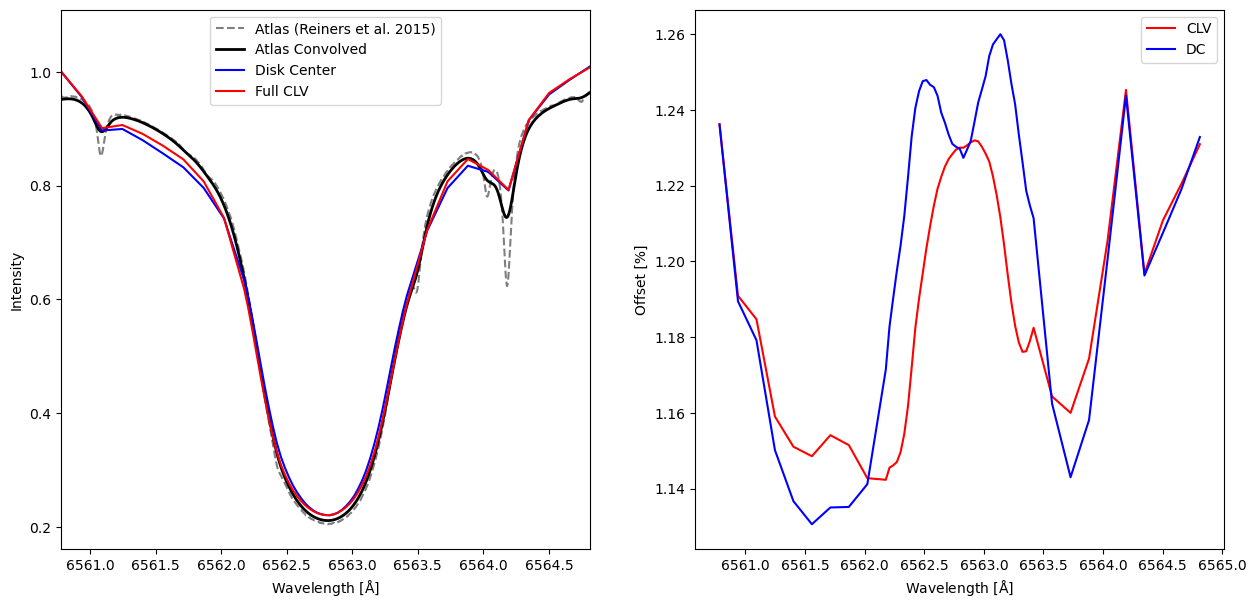

In [41]:
# f_nessi_clv = lambda theta: interp1d(theoretic_line.sst_wav + theta[0], theta[2] * theoretic_line.sst_dc*theoretic_line.sst_clv[index_mu]
#                                         + theta[1], kind='linear', fill_value="extrapolate")
# f_nessi = lambda theta: interp1d(theoretic_line.sst_wav + theta[0], theta[2] * theoretic_line.sst_dc + theta[1]
#                                 , kind='linear', fill_value="extrapolate")

# g = len(self._wavel)
# scaler = 2.7306518951052202e-08

# # dY = np.where(theor_Ha.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_Ha.sst_wav, 0.01, 10)
# #To simulate a specific domain around the well we cam make the errors on the wings huge

# data = [self._wavel,  self.quiet_spect /scaler,np.zeros(g)+0.01,np.zeros(g)+0.01]

# mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=np.array([-0.215, -0.111, 1.26]), fout_model=None, plot=False)
#                                                                 #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
# theta = mini['x']
# da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="Data met fit ",labelx=" $x[]$",
#             labely=" $y$  []", figname=None , error=False)
# da.kwaliteit_fit(data, mini)




# theta = rv, multiplier

print(aa2, np.shape(aa2))
ff = interp1d(fdw+rv, aa2, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_wav)

multiplier = 1/0.85 # find for this and for rv an minimizing algoritm

fig = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
plt.plot(fdw + rv ,fd*multiplier, color='black', linestyle='--', alpha=0.5, label='Atlas (Reiners et al. 2015)')
plt.plot(fdw + rv,aa2*multiplier, color='black', lw=2, label='Atlas Convolved')
plt.plot(sst_wav, sst_dc, color='blue', label='Disk Center')
plt.plot(sst_wav, test_si, color='red', label='Full CLV')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')
plt.legend()

print('1', fdw[0],sst_wav[0])
print('2', max([fdw[0],sst_wav[0]]))

xmin=np.max([fdw[0],sst_wav[0]])
xmax=np.min([fdw[-1],sst_wav[-1]])
plt.xlim(xmin, xmax)

plt.subplot(122)
plt.plot(sst_wav, test_si/fdd, label='CLV', color='red')
plt.plot(sst_wav, sst_dc/fdd, label='DC', color='blue')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Offset [%]')
plt.legend()

# plt.ylim(0.93,1.025)
plt.show()


In [42]:
import use_nessi as un
un.test()


jow peace out yolo
